# Further Cleaning & Exploratory Analysis

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn')

In [2]:
# Importing the cleaned dataset
df = pd.read_csv(r"C:\Users\Robert\OneDrive\Desktop\aus_final.csv")
display(df.info())
print('----------------------------------')
display(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56 entries, 0 to 55
Data columns (total 9 columns):
date_of_incident                56 non-null object
number_of_victims_under_18      56 non-null int64
number_of_victims_over_18       56 non-null int64
number_of_offenders_under_18    56 non-null int64
number_of_offenders_over_18     56 non-null int64
race_of_offender(s)             56 non-null object
offense                         56 non-null object
offense_location                56 non-null object
motivation                      56 non-null object
dtypes: int64(4), object(5)
memory usage: 4.0+ KB


None

----------------------------------


,number_of_victims_under_18,number_of_victims_over_18,number_of_offenders_under_18,number_of_offenders_over_18
count,56.000000,56.000000,56.000000,56.000000
mean,0.053571,0.910714,0.125000,1.017857
std,0.227208,0.394360,0.506772,0.820002
min,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,0.000000,1.000000
50%,0.000000,1.000000,0.000000,1.000000
75%,0.000000,1.000000,0.000000,1.000000
max,1.000000,2.000000,3.000000,4.000000


## Convert 'date_of_inciedent' to datetime64 and make it the index

In [3]:
df.date_of_incident = df.date_of_incident.astype('datetime64')
df = df.set_index('date_of_incident')

In [4]:
display(df.head())
print('----------------------------------')
display(df.shape)
print('----------------------------------')
display(df.index)

,number_of_victims_under_18,number_of_victims_over_18,number_of_offenders_under_18,number_of_offenders_over_18,race_of_offender(s),offense,offense_location,motivation
date_of_incident,,,,,,,,
2017-01-01,0,1,0,1,White,Aggravated Assault,Park/Playground,Anti-African American
2017-02-01,0,1,0,1,African American,Aggravated Assault,Highway/Road/Alley/Street/Sidewalk,Anti-Caucasian
2017-03-21,0,0,0,0,Unknown,Destruction,Highway/Road/Alley/Street/Sidewalk,Anti-Jewish
2017-04-12,0,0,0,0,White,Simple Assault,Air/Bus/Train Terminal,Anti-Jewish
2017-05-15,1,0,1,2,White,Simple Assault,Residence/Home,Anti-LGBT


----------------------------------


(56, 8)

----------------------------------


DatetimeIndex(['2017-01-01', '2017-02-01', '2017-03-21', '2017-04-12',
               '2017-05-15', '2017-06-04', '2017-06-15', '2017-06-17',
               '2017-07-01', '2017-07-05', '2017-07-20', '2017-07-21',
               '2017-10-15', '2017-10-24', '2017-11-10', '2017-11-16',
               '2017-11-26', '2018-01-19', '2018-01-25', '2018-02-08',
               '2018-02-22', '2018-03-02', '2018-03-06', '2018-03-08',
               '2018-04-01', '2018-04-30', '2018-05-21', '2018-06-16',
               '2018-06-28', '2018-08-13', '2018-08-25', '2018-09-09',
               '2018-09-11', '2018-10-11', '2018-10-29', '2018-12-15',
               '2018-12-29', '2019-01-19', '2019-02-22', '2019-03-31',
               '2019-04-04', '2019-06-11', '2019-08-06', '2019-08-12',
               '2019-08-24', '2019-11-23', '2019-12-19', '2019-12-30',
               '2020-03-01', '2020-03-08', '2020-03-22', '2020-03-22',
               '2020-04-20', '2020-04-29', '2020-05-17', '2020-05-20'],
     

## Not much we can do with the 'victims' and 'offenders' columns just yet...
We have much more categorical data we can work with first. 

### Question 1. How are reported incidences in Austin distributed according to motivation? 

In [19]:
bias = df.motivation.value_counts()
print('total number of reported hate crimes since 2017:')
display(bias.sum())

total number of reported hate crimes since 2017:


56

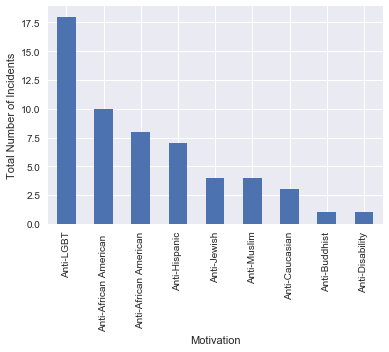

In [18]:
bias.plot.bar()
plt.xlabel('Motivation')
plt.ylabel('Total Number of Incidents')
plt.show()

### I am unsure why the Anti-African American category is splitting into two. Regardless, it still maintains its accuracy.
     1. A point-of-note -- of the total reported, alleged hate crimes in Austin, since 2017, 32.14% were allegedly motivated by Anti-LGBT Bias. 

### Question 2. How are the offense-types distributed? 

Assault                21
Simple Assault          8
Intimidation            7
Criminal Mischief       5
Vandalism               4
Aggravated Assault      3
Destruction             2
Assault by Contact      1
Burglary/Assault        1
Assault with Injury     1
Robbery                 1
Assault by Threat       1
Theft                   1
Name: offense, dtype: int64

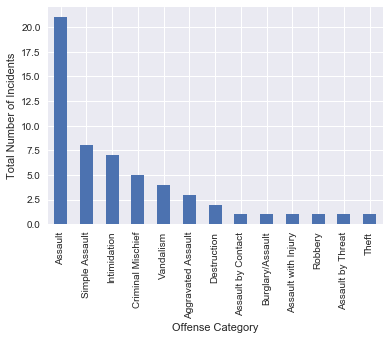

In [10]:
offense_count = df.offense.value_counts()
display(offense_count)
offense_count.plot.bar()
plt.xlabel('Offense Category')
plt.ylabel('Total Number of Incidents')
plt.show()

### Question 3. How are the alleged offenders distributed according to race? 

White                      25
Hispanic                   11
Unknown                     8
Group of Multiple Races     3
African Amerian             3
African American            2
Hispanic (3)                1
White                       1
Hispanic (2) White (2)      1
Asianc                      1
Name: race_of_offender(s), dtype: int64

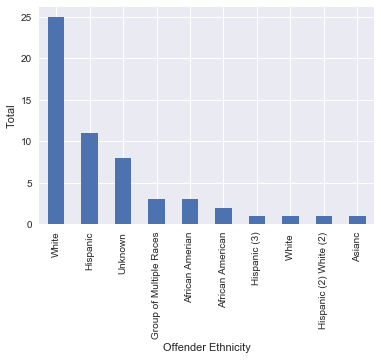

In [13]:
offenders_count = df['race_of_offender(s)'].value_counts()
display(offenders_count)
offenders_count.plot.bar()
plt.xlabel('Offender Ethnicity')
plt.ylabel('Total')
plt.show()

In [8]:
# Saving copy of dataset 
df.to_csv(r"C:\Users\Robert\OneDrive\Desktop\aus_final.csv")